# Methods 2024
## Stats V: Bayesian statistics (2)

Thursday, 10/3/24

In [1]:

# Uncomment whatever you need.

# If needing to make conda env:
# conda create -c conda-forge -n pymc "pymc>=5" numpyro seaborn matplotlib arviz numpy pandas scikit-learn scipy

# Or on Colab:
!pip install pymc>=5
!pip install arviz
!pip install ipympl

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 6.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [2]:
######################## new stuff ########################

import pymc as pm
# Pymc is a user-friendly Bayesian statistics package for Python

import arviz as az
# Arviz is a plotting package (built on matplotlib) meant for Bayesian statistics


######################## packages/modules we know ########################

from sklearn import linear_model
# for frequentist linear regressions

from scipy import stats
# scipy.stats has methods for drawing distributions

import numpy as np
# numpy is our main "mathematics" engine

import pandas as pd
# pandas is our dataframe package

from matplotlib import pyplot as plt
import seaborn as sns

from io import StringIO

# matplotlib.pyplot is our main plotting engine, while seaborn is built upon matplotlib
# and has a lot of specific functionality

%config InlineBackend.figure_format='retina'
%matplotlib inline

# The BEST test: Bayesian Estimation Supercedes the T-Test

In [3]:
waffles = pd.read_json(
    StringIO('{"Location":{"0":"Alabama","1":"Alaska","2":"Arizona","3":"Arkansas","4":"California","5":"Colorado","6":"Connecticut","7":"Delaware","8":"District of Columbia","9":"Florida","10":"Georgia","11":"Hawaii","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Minnesota","24":"Mississippi","25":"Missouri","26":"Montana","27":"Nebraska","28":"New Hampshire","29":"New Jersey","30":"New Mexico","31":"New York","32":"North Carolina","33":"North Dakota","34":"Ohio","35":"Oklahoma","36":"Oregon","37":"Pennsylvania","38":"Rhode Island","39":"South Carolina","40":"South Dakota","41":"Tennessee","42":"Texas","43":"Utah","44":"Vermont","45":"Virginia","46":"Washington","47":"West Virginia","48":"Wisconsin","49":"Wyoming"},"Population":{"0":4.78,"1":0.71,"2":6.33,"3":2.92,"4":37.25,"5":5.03,"6":3.57,"7":0.9,"8":0.6,"9":18.8,"10":9.69,"11":1.36,"12":1.57,"13":12.83,"14":6.48,"15":3.05,"16":2.85,"17":4.34,"18":4.53,"19":1.33,"20":5.77,"21":6.55,"22":9.88,"23":5.3,"24":2.97,"25":5.99,"26":0.99,"27":1.83,"28":1.32,"29":8.79,"30":2.06,"31":19.38,"32":9.54,"33":0.67,"34":11.54,"35":3.75,"36":3.83,"37":12.7,"38":1.05,"39":4.63,"40":0.81,"41":6.35,"42":25.15,"43":2.76,"44":0.63,"45":8.0,"46":6.72,"47":1.85,"48":5.69,"49":0.56},"MedianAgeMarriage":{"0":25.3,"1":25.2,"2":25.8,"3":24.3,"4":26.8,"5":25.7,"6":27.6,"7":26.6,"8":29.7,"9":26.4,"10":25.9,"11":26.9,"12":23.2,"13":27.0,"14":25.7,"15":25.4,"16":25.0,"17":24.8,"18":25.9,"19":26.4,"20":27.3,"21":28.5,"22":26.4,"23":26.3,"24":25.8,"25":25.6,"26":25.7,"27":25.4,"28":26.8,"29":27.7,"30":25.8,"31":28.4,"32":25.7,"33":25.3,"34":26.3,"35":24.4,"36":26.0,"37":27.1,"38":28.2,"39":26.4,"40":25.6,"41":25.2,"42":25.2,"43":23.3,"44":26.9,"45":26.4,"46":25.9,"47":25.0,"48":26.3,"49":24.2},"Marriage":{"0":20.2,"1":26.0,"2":20.3,"3":26.4,"4":19.1,"5":23.5,"6":17.1,"7":23.1,"8":17.7,"9":17.0,"10":22.1,"11":24.9,"12":25.8,"13":17.9,"14":19.8,"15":21.5,"16":22.1,"17":22.2,"18":20.6,"19":13.5,"20":18.3,"21":15.8,"22":16.5,"23":15.3,"24":19.3,"25":18.6,"26":18.5,"27":19.6,"28":16.7,"29":14.8,"30":20.4,"31":16.8,"32":20.4,"33":26.7,"34":16.9,"35":23.8,"36":18.9,"37":15.5,"38":15.0,"39":18.1,"40":20.1,"41":19.4,"42":21.5,"43":29.6,"44":16.4,"45":20.5,"46":21.4,"47":22.2,"48":17.2,"49":30.7},"Divorce":{"0":12.7,"1":12.5,"2":10.8,"3":13.5,"4":8.0,"5":11.6,"6":6.7,"7":8.9,"8":6.3,"9":8.5,"10":11.5,"11":8.3,"12":7.7,"13":8.0,"14":11.0,"15":10.2,"16":10.6,"17":12.6,"18":11.0,"19":13.0,"20":8.8,"21":7.8,"22":9.2,"23":7.4,"24":11.1,"25":9.5,"26":9.1,"27":8.8,"28":10.1,"29":6.1,"30":10.2,"31":6.6,"32":9.9,"33":8.0,"34":9.5,"35":12.8,"36":10.4,"37":7.7,"38":9.4,"39":8.1,"40":10.9,"41":11.4,"42":10.0,"43":10.2,"44":9.6,"45":8.9,"46":10.0,"47":10.9,"48":8.3,"49":10.3},"WaffleHouses":{"0":128,"1":0,"2":18,"3":41,"4":0,"5":11,"6":0,"7":3,"8":0,"9":133,"10":381,"11":0,"12":0,"13":2,"14":17,"15":0,"16":6,"17":64,"18":66,"19":0,"20":11,"21":0,"22":0,"23":0,"24":72,"25":39,"26":0,"27":0,"28":0,"29":0,"30":2,"31":0,"32":142,"33":0,"34":64,"35":16,"36":0,"37":11,"38":0,"39":144,"40":0,"41":103,"42":99,"43":0,"44":0,"45":40,"46":0,"47":4,"48":0,"49":0}}')
)

waffles.head()


,Location,Population,MedianAgeMarriage,Marriage,Divorce,WaffleHouses
0,Alabama,4.78,25.3,20.2,12.7,128
1,Alaska,0.71,25.2,26.0,12.5,0
2,Arizona,6.33,25.8,20.3,10.8,18
3,Arkansas,2.92,24.3,26.4,13.5,41
4,California,37.25,26.8,19.1,8.0,0


In [4]:
# The South as described by the US census


# Create a "set", another data type
southern = set(
    (
        "Texas",
        "Alabama",
        "Oklahoma",
        "Louisiana",
        "Mississippi",
        "Georgia",
        "Arkansas",
        "Tennessee",
        "Kentucky",
        "North Carolina",
        "South Carolina",
        "West Virginia",
        "Virginia",
        "Maryland",
        "Florida",
    )
)

northern = set(waffles['Location']).difference(southern)

southern = list(southern)
northern = list(northern)

In [5]:
waffles_s = waffles.set_index("Location").loc[southern]
waffles_n = waffles.set_index("Location").loc[northern]


In [6]:
waffles_s

,Population,MedianAgeMarriage,Marriage,Divorce,WaffleHouses
Location,,,,,
Tennessee,6.35,25.2,19.4,11.4,103
Georgia,9.69,25.9,22.1,11.5,381
Oklahoma,3.75,24.4,23.8,12.8,16
Arkansas,2.92,24.3,26.4,13.5,41
South Carolina,4.63,26.4,18.1,8.1,144
Virginia,8.00,26.4,20.5,8.9,40
Louisiana,4.53,25.9,20.6,11.0,66
Kentucky,4.34,24.8,22.2,12.6,64
Mississippi,2.97,25.8,19.3,11.1,72


In [7]:
waffles_n

,Population,MedianAgeMarriage,Marriage,Divorce,WaffleHouses
Location,,,,,
Idaho,1.57,23.2,25.8,7.7,0
New Hampshire,1.32,26.8,16.7,10.1,0
Massachusetts,6.55,28.5,15.8,7.8,0
North Dakota,0.67,25.3,26.7,8.0,0
Colorado,5.03,25.7,23.5,11.6,11
Washington,6.72,25.9,21.4,10.0,0
Rhode Island,1.05,28.2,15.0,9.4,0
Kansas,2.85,25.0,22.1,10.6,6
New York,19.38,28.4,16.8,6.6,0


In [8]:
group1 = waffles_n["Divorce"].values
group2 = waffles_s["Divorce"].values

empircal_mean = waffles["Divorce"].mean()  # mean of ALL values
empircal_stdev = waffles["Divorce"].std() * 2  # expanded std of ALL values

In [9]:
# Prior predictive simiulations

x_range = np.linspace(waffles["Divorce"].min(), waffles["Divorce"].max(), 100)
y1s = []
y2s = []

n_iter = 50

rng = np.random.default_rng(11206)
for i in range(n_iter):

    mu_1 = rng.normal(loc=empircal_mean, scale=empircal_stdev)
    mu_2 = rng.normal(loc=empircal_mean, scale=empircal_stdev)

    sigma_1 = rng.uniform(low=1, high=10)  # adjustment from the BEST paper
    sigma_2 = rng.uniform(low=1, high=10)

    v = rng.exponential(1 / 29) + 1  # as described in the BEST paper

    group1_t = stats.t(df=v, loc=mu_1, scale=sigma_1).pdf(x_range)
    group2_t = stats.t(df=v, loc=mu_2, scale=sigma_2).pdf(x_range)

    y1s.append(group1_t)
    y2s.append(group2_t)

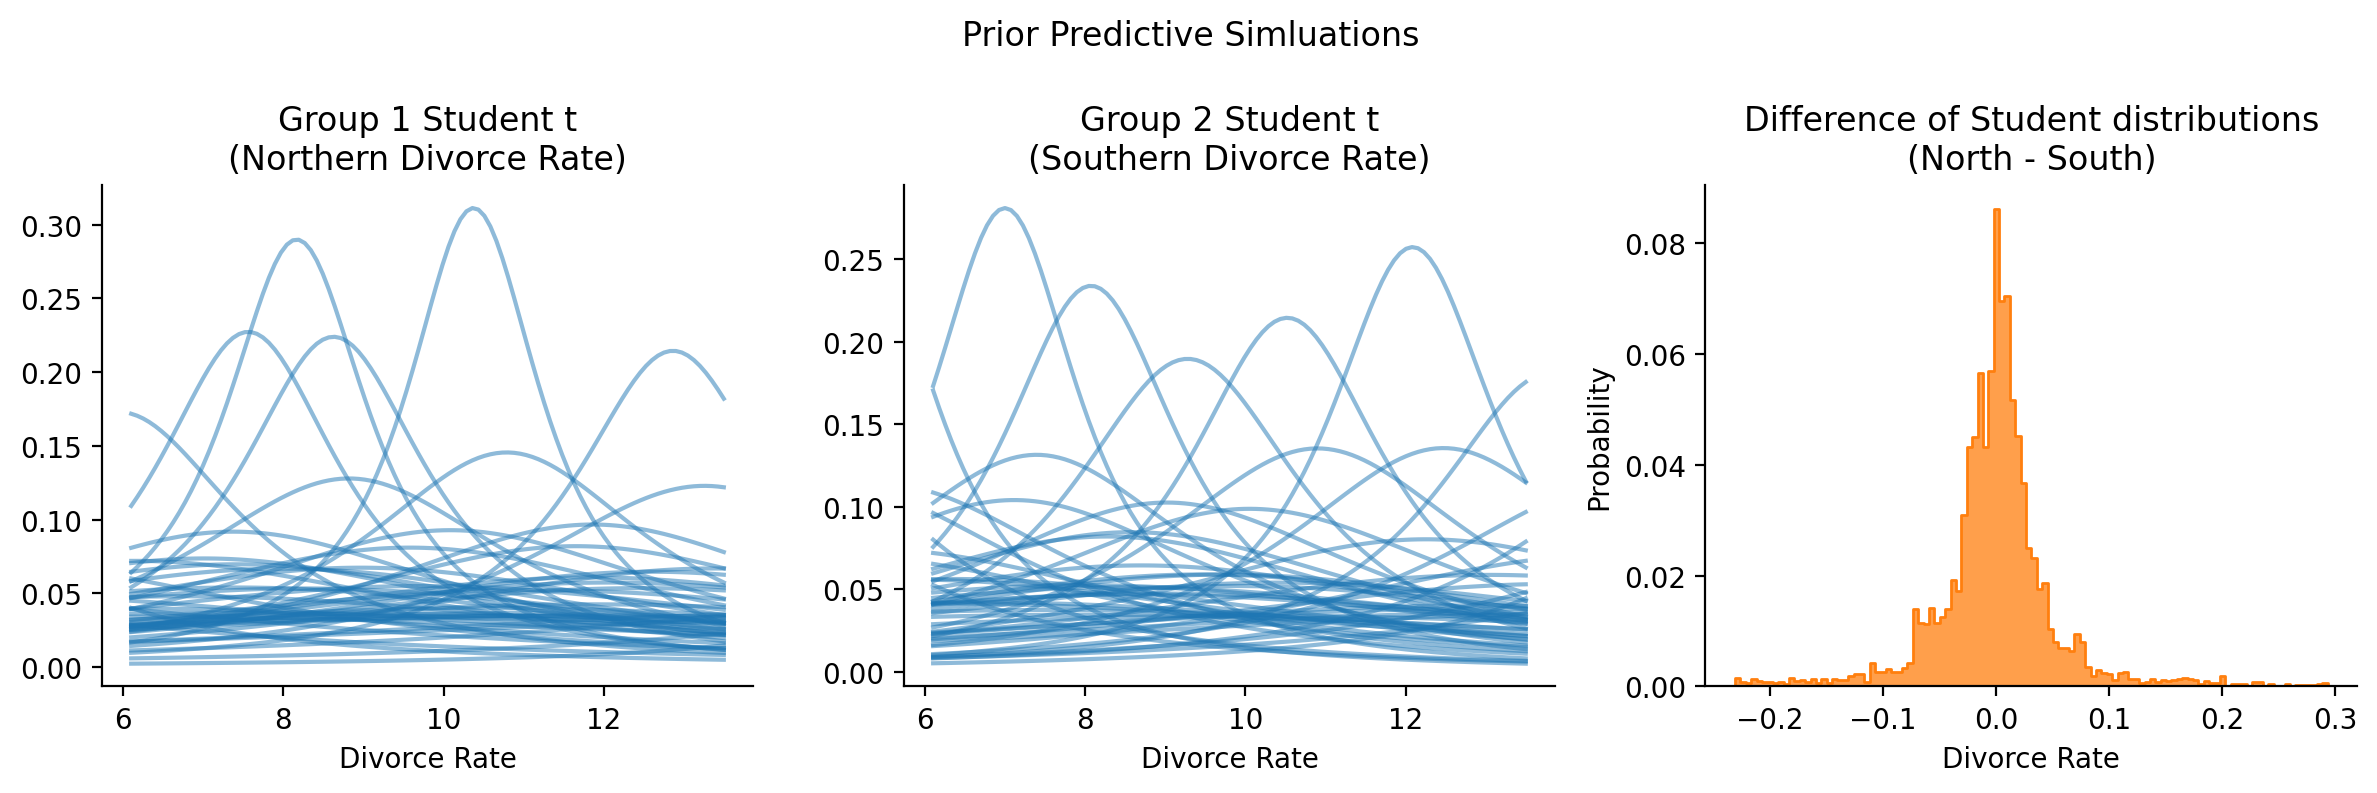

In [10]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=3)

for i in range(n_iter):
    axes[0].plot(x_range, y1s[i], color="tab:blue", alpha=0.5)
    axes[1].plot(x_range, y2s[i], color="tab:blue", alpha=0.5)

sns.histplot(
    np.array(y1s).reshape(-1) - np.array(y2s).reshape(-1),
    color="tab:orange",
    stat="probability",
    element="step",
    ax=axes[2],
)

axes[0].set_title("Group 1 Student t\n(Northern Divorce Rate)")
axes[1].set_title("Group 2 Student t\n(Southern Divorce Rate)")
axes[2].set_title("Difference of Student distributions\n(North - South)")

[ax.set_xlabel("Divorce Rate") for ax in axes]

fig.suptitle('Prior Predictive Simluations')
plt.tight_layout()

sns.despine()


In [11]:
# Building our model

with pm.Model() as model:

    mu_1 = pm.Normal("mu_1", mu=empircal_mean, sigma=empircal_stdev)
    mu_2 = pm.Normal("mu_2", mu=empircal_mean, sigma=empircal_stdev)

    sigma_1 = pm.Uniform("sigma_1", lower=1, upper=10)  # adjustment from the BEST paper
    sigma_2 = pm.Uniform("sigma_2", lower=1, upper=10)

    v = pm.Exponential("v", 1 / 29) + 1  # as described in the BEST paper

    # Define our TWO likelihood functions
    group1 = pm.StudentT("north", nu=v, mu=mu_1, sigma=sigma_1, observed=group1)
    group2 = pm.StudentT("south", nu=v, mu=mu_2, sigma=sigma_2, observed=group2)

    trace_model4 = pm.sample(draws=5000, tune=1000, chains=2, cores=1)


Output()

Output()

In [12]:
trace_model4

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

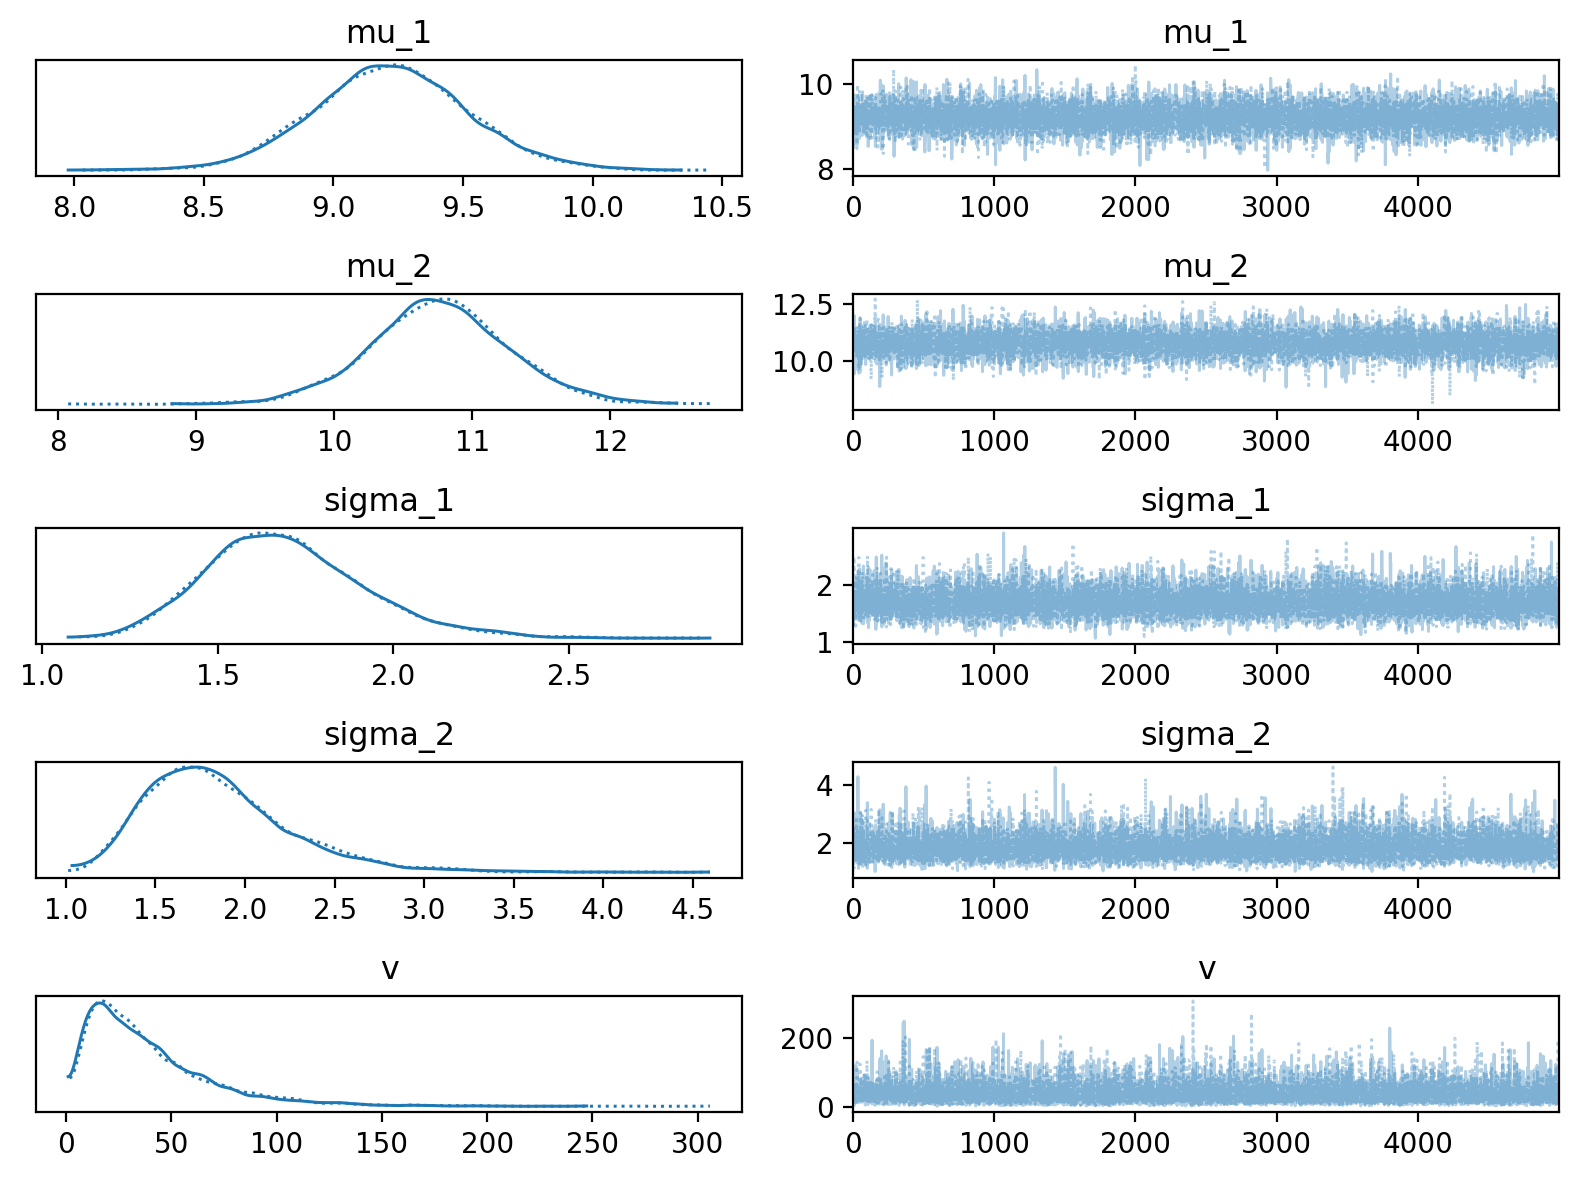

In [13]:
fig, axes = plt.subplots(figsize=(8, 6), ncols=2, nrows=5)

az.plot_trace(trace_model4, axes=axes)

plt.tight_layout()

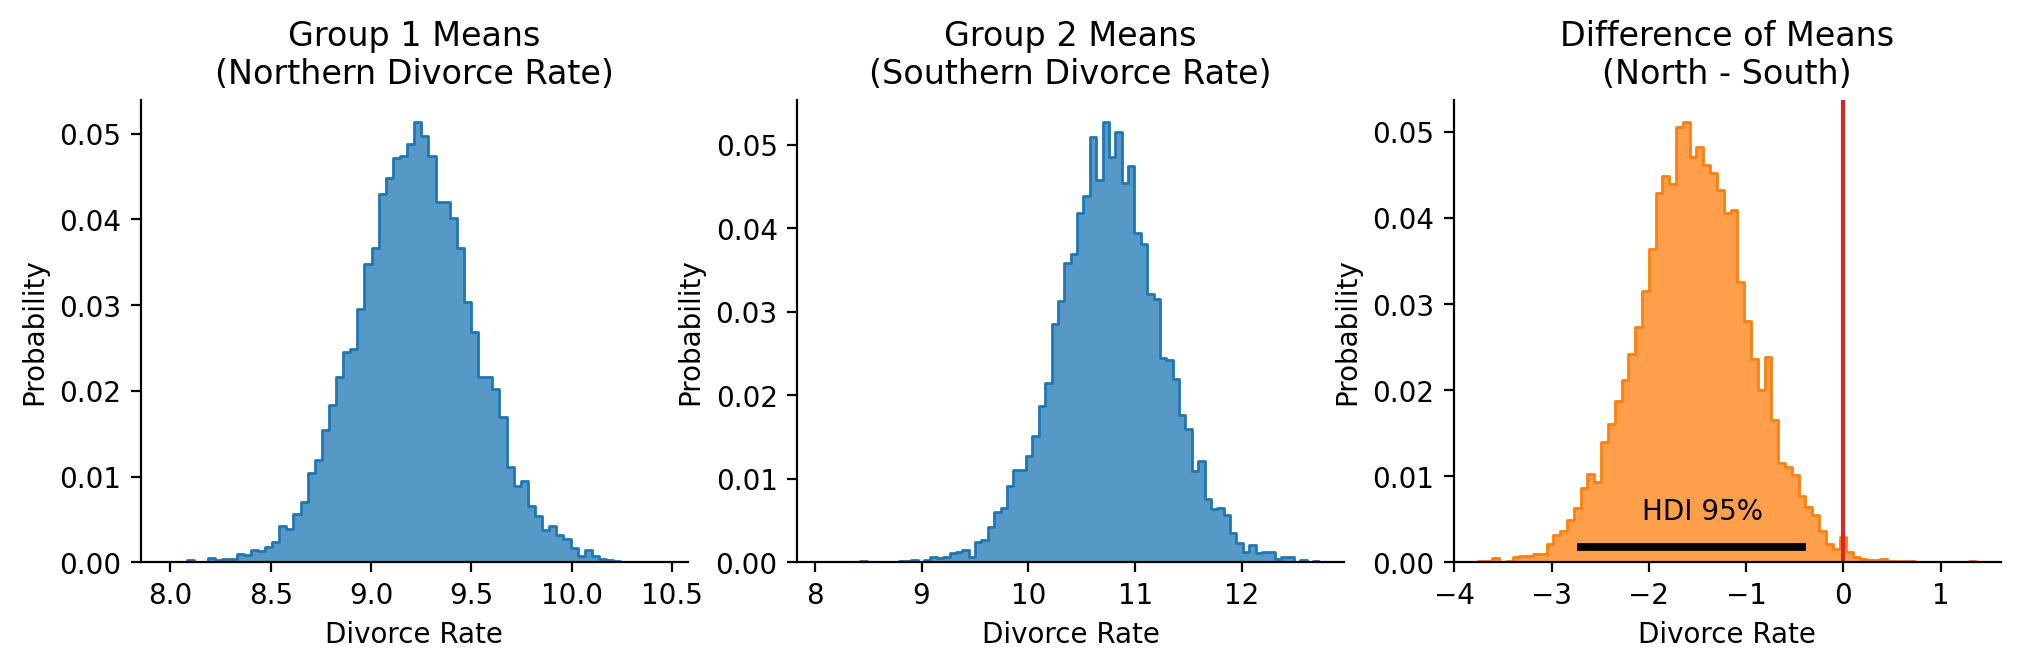

In [14]:
g1_mean = trace_model4.posterior['mu_1'].values.reshape(-1)
g2_mean = trace_model4.posterior['mu_2'].values.reshape(-1)

################################################################

fig, axes = plt.subplots(figsize=(12, 3), ncols=3)

sns.histplot(g1_mean, ax=axes[0], stat="probability", element="step")
sns.histplot(g2_mean, ax=axes[1], stat="probability", element="step")
sns.histplot(g1_mean - g2_mean, ax=axes[2], stat="probability", element="step", color="tab:orange")


# plot axis v line to easily see 0 point
axes[2].axvline(0, color="tab:red")

# plot HDI for more "robust" analysis
hdi_lower, hdi_upper = az.hdi(ary=g1_mean - g2_mean, hdi_prob=0.95)

# I manually adjusted the positions for borth these statements
axes[2].axvspan(ymin=0.03, ymax=0.04, xmin=hdi_lower, xmax=hdi_upper, color="black")
axes[2].text(x=((hdi_lower + hdi_upper) / 2) - 0.5, y=0.005, s="HDI 95%")

axes[0].set_title("Group 1 Means\n(Northern Divorce Rate)")
axes[1].set_title("Group 2 Means\n(Southern Divorce Rate)")
axes[2].set_title("Difference of Means\n(North - South)")


[ax.set_xlabel("Divorce Rate") for ax in axes]


sns.despine()


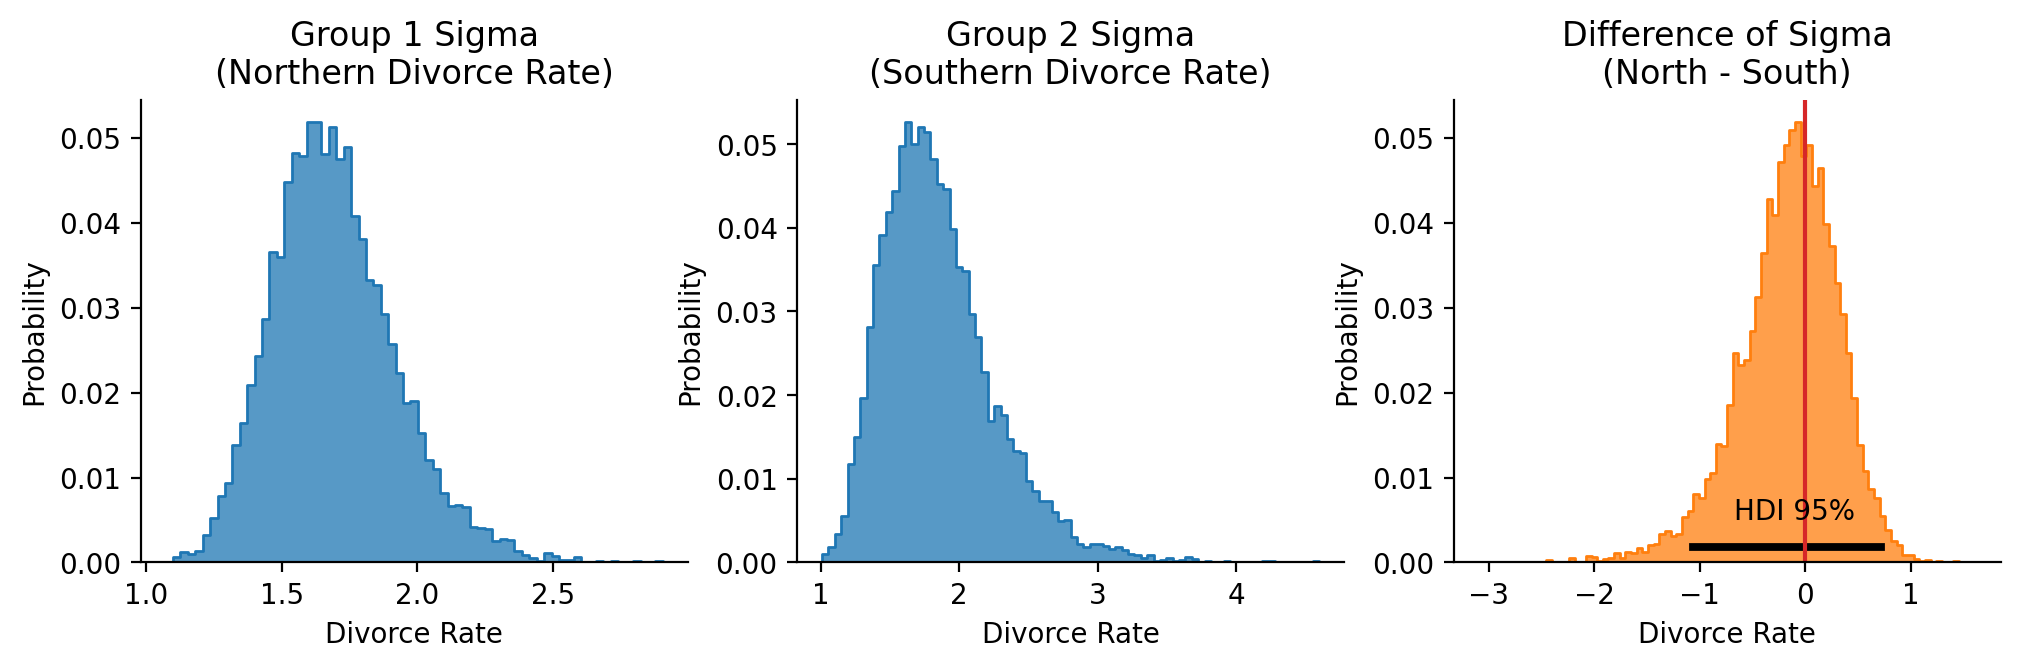

In [15]:
g1_sigma = trace_model4.posterior['sigma_1'].values.reshape(-1)
g2_sigma = trace_model4.posterior['sigma_2'].values.reshape(-1)

fig, axes = plt.subplots(figsize=(12, 3), ncols=3)

sns.histplot(g1_sigma, ax=axes[0], stat="probability", element="step")
sns.histplot(g2_sigma, ax=axes[1], stat="probability", element="step")
sns.histplot(g1_sigma - g2_sigma, ax=axes[2], stat="probability", element="step", color="tab:orange")


# plot axis v line to easily see 0 point
axes[2].axvline(0, color="tab:red")

# plot HDI for more "robust" analysis
hdi_lower, hdi_upper = az.hdi(ary=g1_sigma - g2_sigma, hdi_prob=0.95)

# I manually adjusted the positions for borth these statements
axes[2].axvspan(ymin=0.03, ymax=0.04, xmin=hdi_lower, xmax=hdi_upper, color="black")
axes[2].text(x=((hdi_lower + hdi_upper) / 2) - 0.5, y=0.005, s="HDI 95%")

axes[0].set_title("Group 1 Sigma\n(Northern Divorce Rate)")
axes[1].set_title("Group 2 Sigma\n(Southern Divorce Rate)")
axes[2].set_title("Difference of Sigma\n(North - South)")

[ax.set_xlabel("Divorce Rate") for ax in axes]

sns.despine()


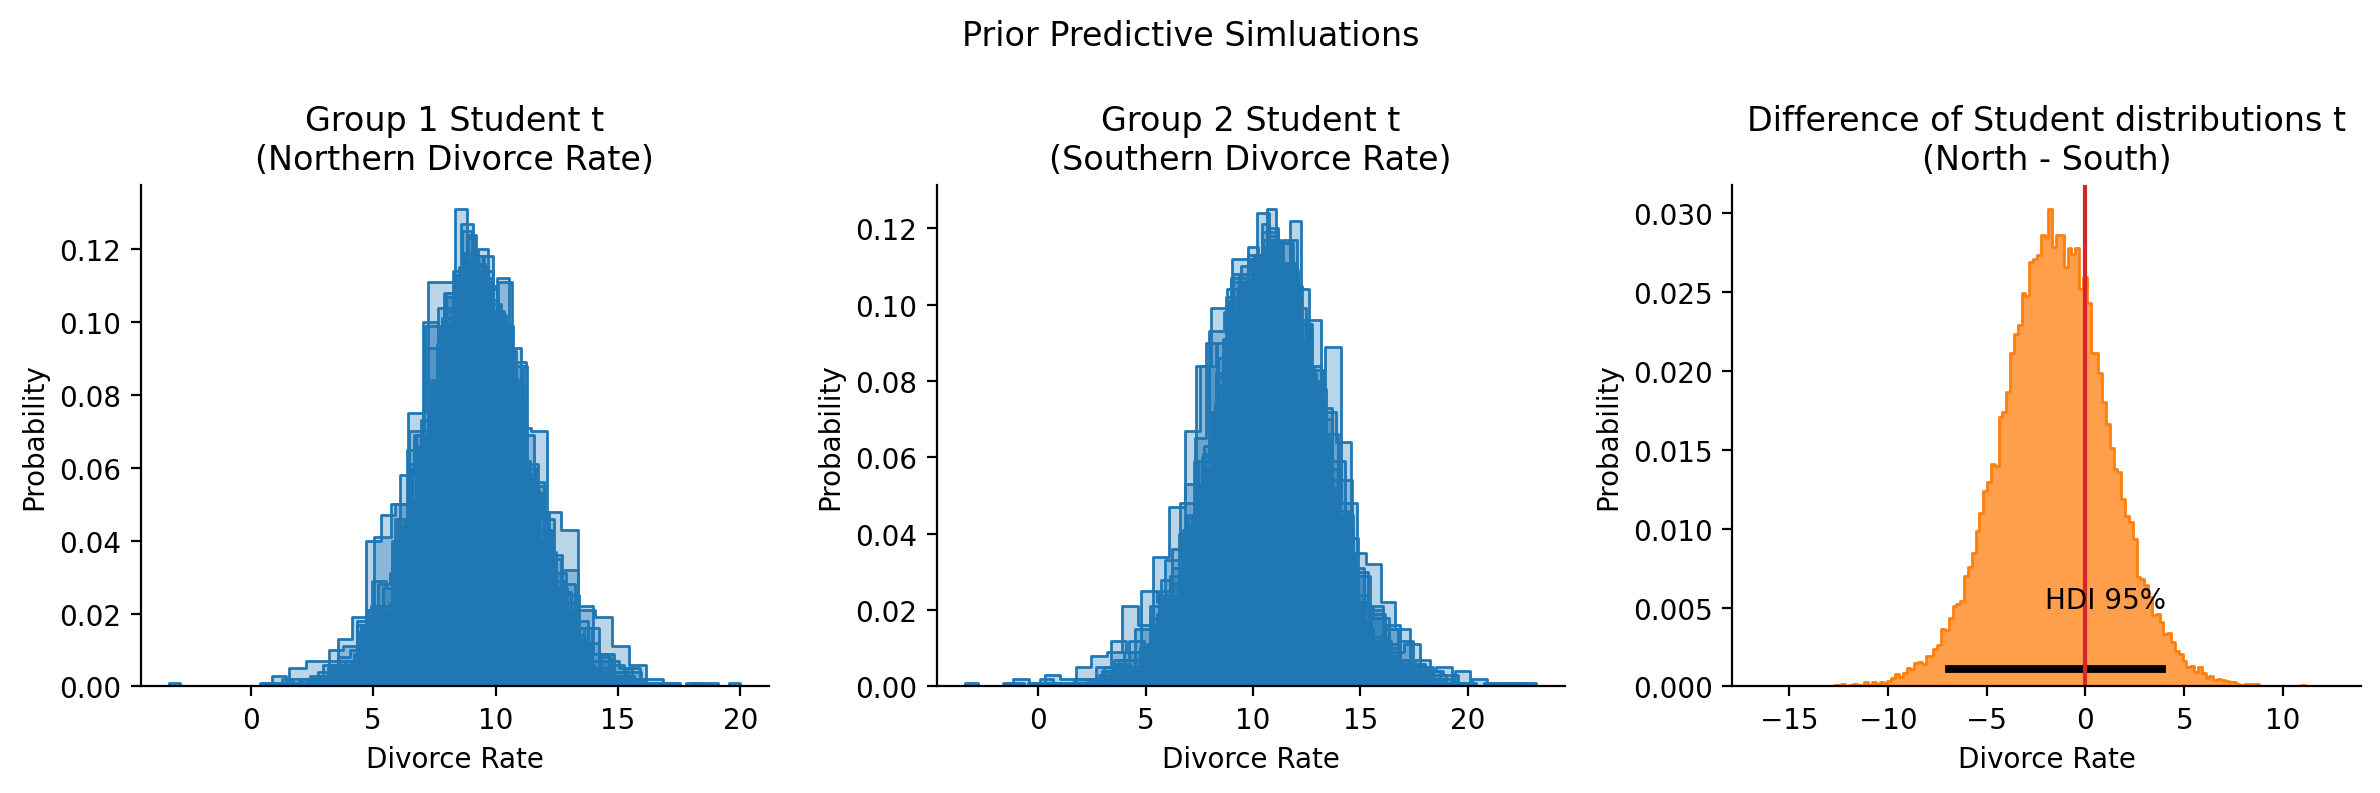

In [16]:
# POSTERIOR predictive analysis
# Simulating the different student t distributions that could describe our data

y1s = []
y2s = []

n_iter = 50

rng = np.random.default_rng(11206)
for i in rng.integers(low=0, high=10000, size=50):

    mu_1 = trace_model4.posterior['mu_1'].values.reshape(-1)[i]
    mu_2 = trace_model4.posterior['mu_2'].values.reshape(-1)[i]

    sigma_1 = trace_model4.posterior['sigma_1'].values.reshape(-1)[i]
    sigma_2 = trace_model4.posterior['sigma_2'].values.reshape(-1)[i]

    v = trace_model4.posterior['v'].values.reshape(-1)[i]

    group1_t = (rng.standard_t(df=v, size=1000) * sigma_1) + mu_1
    group2_t = (rng.standard_t(df=v, size=1000) * sigma_2) + mu_2

    y1s.append(group1_t)
    y2s.append(group2_t)


################################################################################

fig, axes = plt.subplots(figsize=(12, 4), ncols=3)

for i in range(n_iter):
  sns.histplot(
      np.array(y1s[i]),
      color="tab:blue",
      stat="probability",
      element="step",
      ax=axes[0],
      alpha=0.3
  )

  sns.histplot(
      np.array(y2s[i]),
      color="tab:blue",
      stat="probability",
      element="step",
      ax=axes[1],
      alpha=0.3
  )

sns.histplot(
    np.array(y1s).reshape(-1) - np.array(y2s).reshape(-1),
    color="tab:orange",
    stat="probability",
    element="step",
    ax=axes[2],
)

# Plot easy comparison line
axes[2].axvline(0, color='tab:red')

# plot HDI for more "robust" analysis
hdi_lower, hdi_upper = az.hdi(ary=np.array(y1s).reshape(-1) - np.array(y2s).reshape(-1), hdi_prob=0.95)

# I manually adjusted the positions for borth these statements
axes[2].axvspan(ymin=0.03, ymax=0.04, xmin=hdi_lower, xmax=hdi_upper, color="black")
axes[2].text(x=((hdi_lower + hdi_upper) / 2) - 0.5, y=0.005, s="HDI 95%")

axes[0].set_title("Group 1 Student t\n(Northern Divorce Rate)")
axes[1].set_title("Group 2 Student t\n(Southern Divorce Rate)")
axes[2].set_title("Difference of Student distributions t\n(North - South)")

[ax.set_xlabel("Divorce Rate") for ax in axes]

fig.suptitle('Prior Predictive Simluations')
plt.tight_layout()

sns.despine()


In [17]:
stats.ttest_ind(a=waffles_s['Divorce'].values, b=waffles_n['Divorce'].values)

TtestResult(statistic=2.993216582152027, pvalue=0.004352275331853111, df=48.0)

# Continue working on the homework

Run a BEST test to compare two different groups of primates (species, clade, whatever your pick of two) from the `milk` dataset (the dataset from last homework).

1. Clearly state the two groups you're comparing
2. Run the model
3. Show a plot like the one right above this text (the three panels) to report your results.
4. Write a few sentences describing what you did (in your own words) and the result.

In [18]:
milk = pd.read_json(
    StringIO('{"clade":{"0":"Strepsirrhine","1":"Strepsirrhine","2":"Strepsirrhine","3":"Strepsirrhine","4":"Strepsirrhine","5":"New World Monkey","6":"New World Monkey","7":"New World Monkey","8":"New World Monkey","9":"New World Monkey","10":"New World Monkey","11":"New World Monkey","12":"New World Monkey","13":"New World Monkey","14":"Old World Monkey","15":"Old World Monkey","16":"Old World Monkey","17":"Old World Monkey","18":"Old World Monkey","19":"Old World Monkey","20":"Ape","21":"Ape","22":"Ape","23":"Ape","24":"Ape","25":"Ape","26":"Ape","27":"Ape","28":"Ape"},"species":{"0":"Eulemur fulvus","1":"E macaco","2":"E mongoz","3":"E rubriventer","4":"Lemur catta","5":"Alouatta seniculus","6":"A palliata","7":"Cebus apella","8":"Saimiri boliviensis","9":"S sciureus","10":"Cebuella pygmaea","11":"Callimico goeldii","12":"Callithrix jacchus","13":"Leontopithecus rosalia","14":"Chlorocebus pygerythrus","15":"Miopithecus talpoin","16":"M fuscata","17":"M mulatta","18":"M sinica","19":"Papio spp","20":"Nomascus concolor","21":"Hylobates lar","22":"Symphalangus syndactylus","23":"Pongo pygmaeus","24":"Gorilla gorilla gorilla","25":"G gorilla beringei","26":"Pan paniscus","27":"P troglodytes","28":"Homo sapiens"},"kcal.per.g":{"0":0.49,"1":0.51,"2":0.46,"3":0.48,"4":0.6,"5":0.47,"6":0.56,"7":0.89,"8":0.91,"9":0.92,"10":0.8,"11":0.46,"12":0.71,"13":0.71,"14":0.73,"15":0.68,"16":0.72,"17":0.97,"18":0.79,"19":0.84,"20":0.48,"21":0.62,"22":0.51,"23":0.54,"24":0.49,"25":0.53,"26":0.48,"27":0.55,"28":0.71},"perc.fat":{"0":16.6,"1":19.27,"2":14.11,"3":14.91,"4":27.28,"5":21.22,"6":29.66,"7":53.41,"8":46.08,"9":50.58,"10":41.35,"11":3.93,"12":38.38,"13":36.9,"14":39.17,"15":40.15,"16":53.05,"17":55.51,"18":48.9,"19":54.31,"20":15.96,"21":34.51,"22":26.42,"23":37.78,"24":27.18,"25":30.59,"26":21.18,"27":36.84,"28":50.49},"perc.protein":{"0":15.42,"1":16.91,"2":16.85,"3":13.18,"4":19.5,"5":23.58,"6":23.46,"7":15.8,"8":23.34,"9":22.33,"10":20.85,"11":25.3,"12":20.09,"13":21.27,"14":14.65,"15":18.08,"16":13.0,"17":13.17,"18":13.91,"19":10.97,"20":12.52,"21":12.57,"22":13.46,"23":7.37,"24":16.29,"25":20.77,"26":11.68,"27":9.54,"28":9.84},"perc.lactose":{"0":67.98,"1":63.82,"2":69.04,"3":71.91,"4":53.22,"5":55.2,"6":46.88,"7":30.79,"8":30.58,"9":27.09,"10":37.8,"11":70.77,"12":41.53,"13":41.83,"14":46.18,"15":41.77,"16":33.95,"17":31.32,"18":37.19,"19":34.72,"20":71.52,"21":52.92,"22":60.12,"23":54.85,"24":56.53,"25":48.64,"26":67.14,"27":53.62,"28":39.67},"mass":{"0":1.95,"1":2.09,"2":2.51,"3":1.62,"4":2.19,"5":5.25,"6":5.37,"7":2.51,"8":0.71,"9":0.68,"10":0.12,"11":0.47,"12":0.32,"13":0.6,"14":3.47,"15":1.55,"16":7.08,"17":3.24,"18":7.94,"19":12.3,"20":7.59,"21":5.37,"22":10.72,"23":35.48,"24":79.43,"25":97.72,"26":40.74,"27":33.11,"28":54.95},"neocortex.perc":{"0":55.16,"1":null,"2":null,"3":null,"4":null,"5":64.54,"6":64.54,"7":67.64,"8":null,"9":68.85,"10":58.85,"11":61.69,"12":60.32,"13":null,"14":null,"15":69.97,"16":null,"17":70.41,"18":null,"19":73.4,"20":null,"21":67.53,"22":null,"23":71.26,"24":72.6,"25":null,"26":70.24,"27":76.3,"28":75.49}}')
)

milk.head()

,clade,species,kcal.per.g,perc.fat,perc.protein,perc.lactose,mass,neocortex.perc
0,Strepsirrhine,Eulemur fulvus,0.49,16.60,15.42,67.98,1.95,55.16
1,Strepsirrhine,E macaco,0.51,19.27,16.91,63.82,2.09,NaN
2,Strepsirrhine,E mongoz,0.46,14.11,16.85,69.04,2.51,NaN
3,Strepsirrhine,E rubriventer,0.48,14.91,13.18,71.91,1.62,NaN
4,Strepsirrhine,Lemur catta,0.60,27.28,19.50,53.22,2.19,NaN


In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
# I would like to look at the top 50% highest protein percentage vs the bottom 50% lowest protein percentage impact on neocortex size percentage.
milk_sorted = milk.sort_values(by='perc.protein', ascending=False).reset_index(drop=True)
midpoint = len(milk_sorted) // 2
group_1 = milk_sorted.iloc[:midpoint]
group_2 = milk_sorted.iloc[midpoint:]

empircal_mean = milk["neocortex.perc"].mean()
empircal_stdev = milk["neocortex.perc"].std() * 2

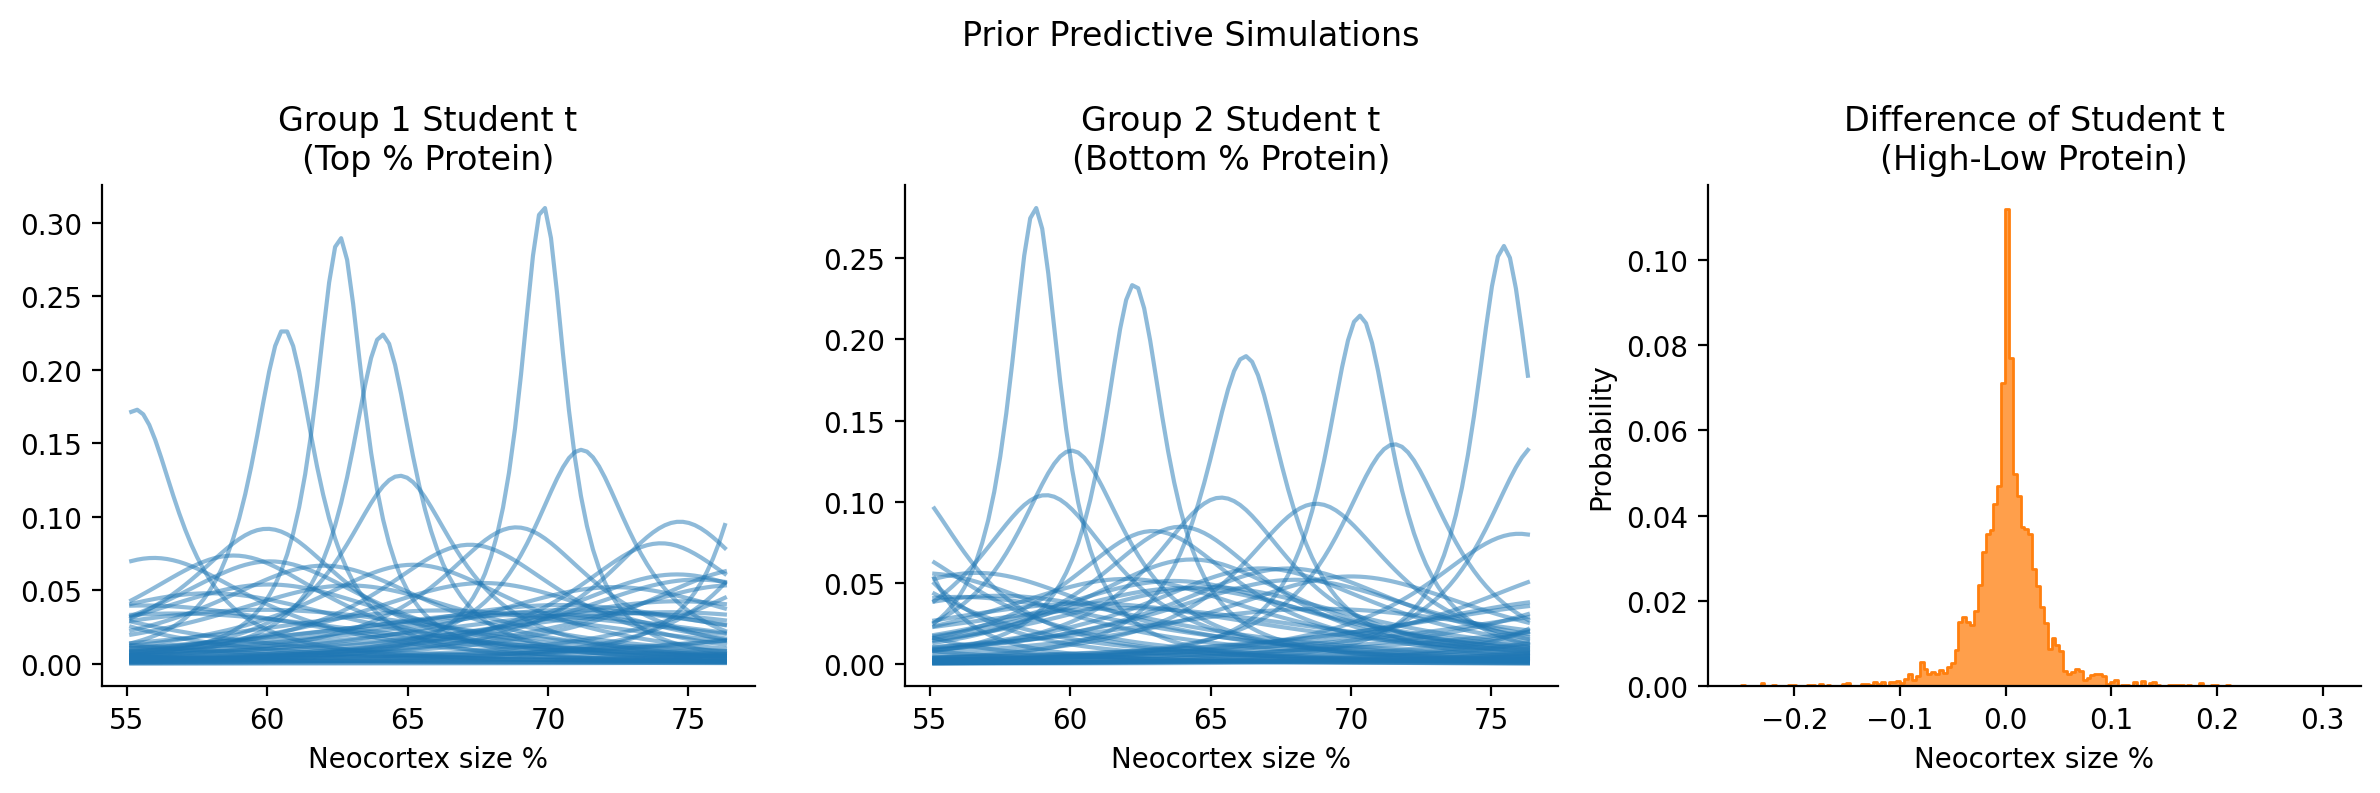

In [29]:
# Variables assumed to be defined earlier: empircal_mean, empircal_stdev
x_range = np.linspace(milk["neocortex.perc"].min(), milk["neocortex.perc"].max(), 100)

# Prior Predictive Simulations
rng = np.random.default_rng(11206)
n_iter = 50
y1s, y2s = [], []

for _ in range(n_iter):
    mu_1, mu_2 = rng.normal(loc=empircal_mean, scale=empircal_stdev, size=2)
    sigma_1, sigma_2 = rng.uniform(1, 10, 2)
    v = rng.exponential(1 / 29) + 1

    y1s.append(stats.t(df=v, loc=mu_1, scale=sigma_1).pdf(x_range))
    y2s.append(stats.t(df=v, loc=mu_2, scale=sigma_2).pdf(x_range))

# Plotting the results
fig, axes = plt.subplots(figsize=(12, 4), ncols=3)
for i in range(n_iter):
    axes[0].plot(x_range, y1s[i], color="tab:blue", alpha=0.5)
    axes[1].plot(x_range, y2s[i], color="tab:blue", alpha=0.5)

sns.histplot(np.array(y1s).reshape(-1) - np.array(y2s).reshape(-1), color="tab:orange", stat="probability", element="step", ax=axes[2])

# Titles and Labels
for ax in axes:
    ax.set_xlabel("Neocortex size %")
axes[0].set_title("Group 1 Student t\n(Top % Protein)")
axes[1].set_title("Group 2 Student t\n(Bottom % Protein)")
axes[2].set_title("Difference of Student t\n(High-Low Protein)")

plt.suptitle('Prior Predictive Simulations')
plt.tight_layout()
sns.despine()

Output()

Output()

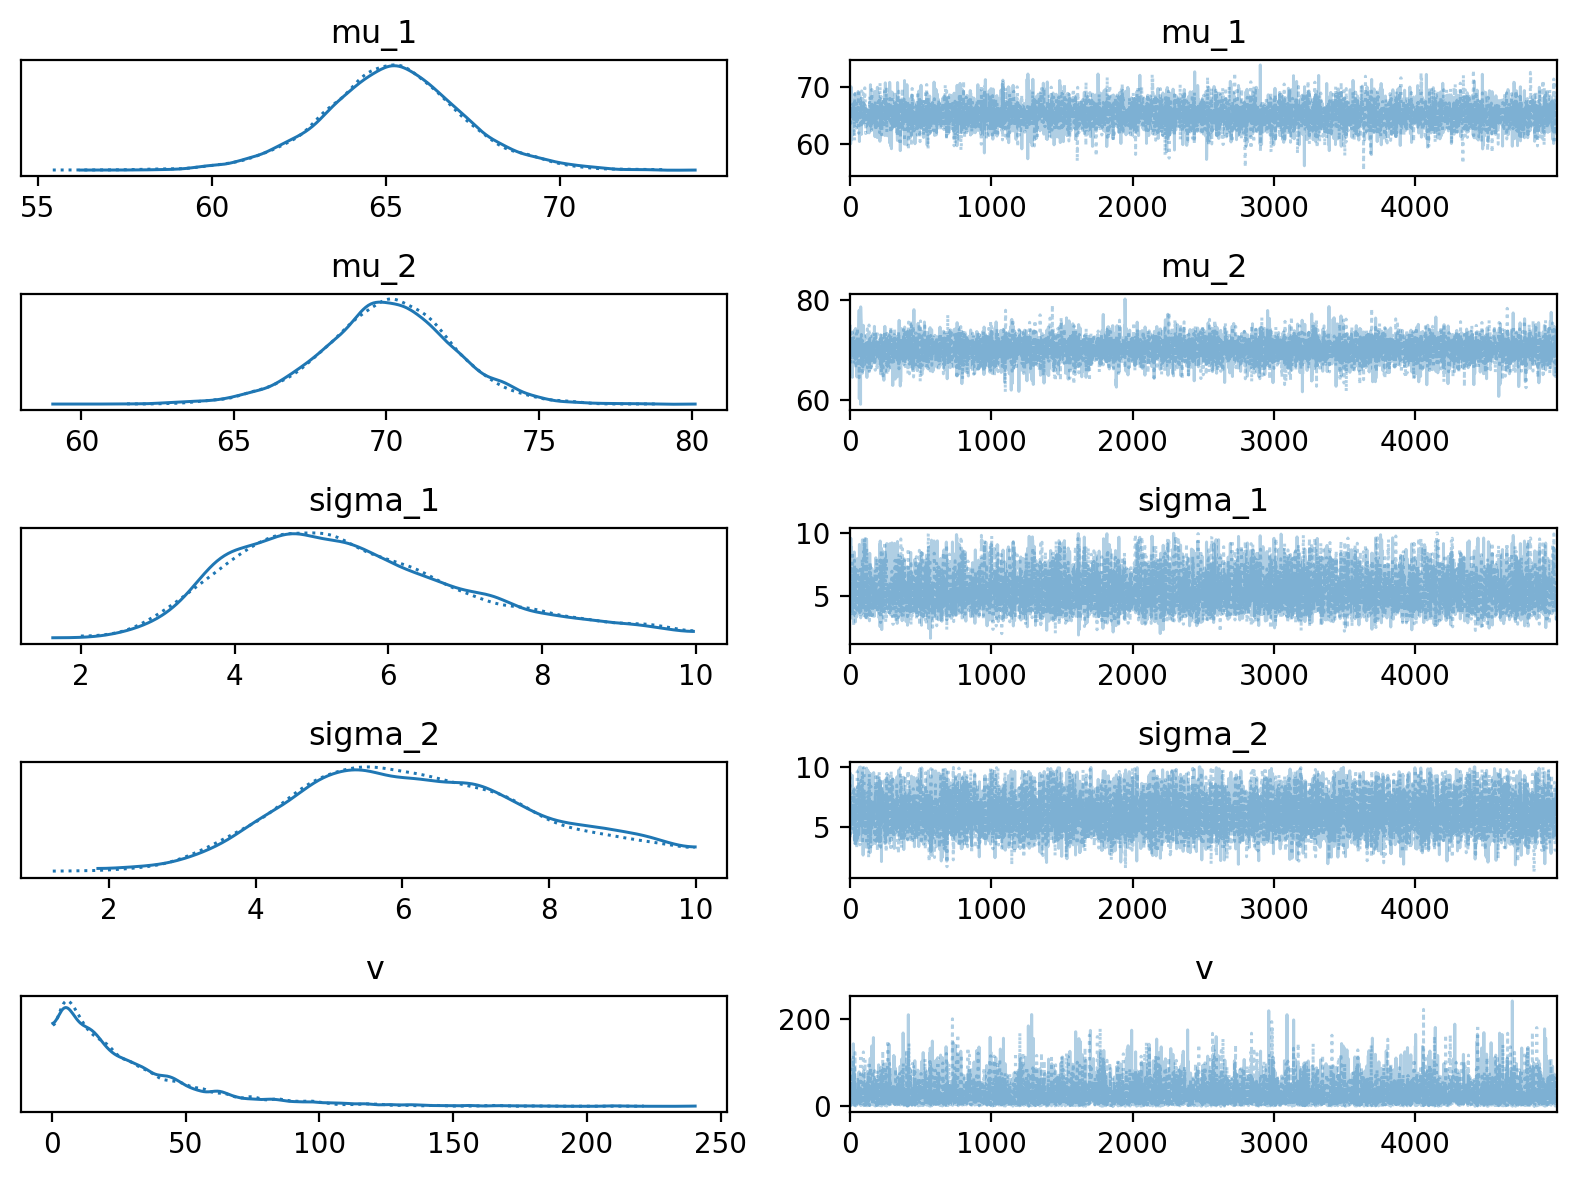

In [27]:
# Building our model
with pm.Model() as model:

    mu_1 = pm.Normal("mu_1", mu=empircal_mean, sigma=empircal_stdev)
    mu_2 = pm.Normal("mu_2", mu=empircal_mean, sigma=empircal_stdev)

    sigma_1 = pm.Uniform("sigma_1", lower=1, upper=10)  # adjustment from the BEST paper
    sigma_2 = pm.Uniform("sigma_2", lower=1, upper=10)

    v = pm.Exponential("v", 1 / 29) + 1  # as described in the BEST paper

    # Define our TWO likelihood functions
    # Use the actual data for the 'observed' argument
    group1_data = group_1["neocortex.perc"].dropna().values # Assuming group_1 is a pandas DataFrame
    group2_data = group_2["neocortex.perc"].dropna().values # Assuming group_2 is a pandas DataFrame

    group1_obs = pm.StudentT("High Protein", nu=v, mu=mu_1, sigma=sigma_1, observed=group1_data)
    group2_obs = pm.StudentT("Low Protein", nu=v, mu=mu_2, sigma=sigma_2, observed=group2_data)

    trace_model5 = pm.sample(draws=5000, tune=1000, chains=2, cores=1)

    fig, axes = plt.subplots(figsize=(8, 6), ncols=2, nrows=5)

az.plot_trace(trace_model5, axes=axes)

plt.tight_layout()

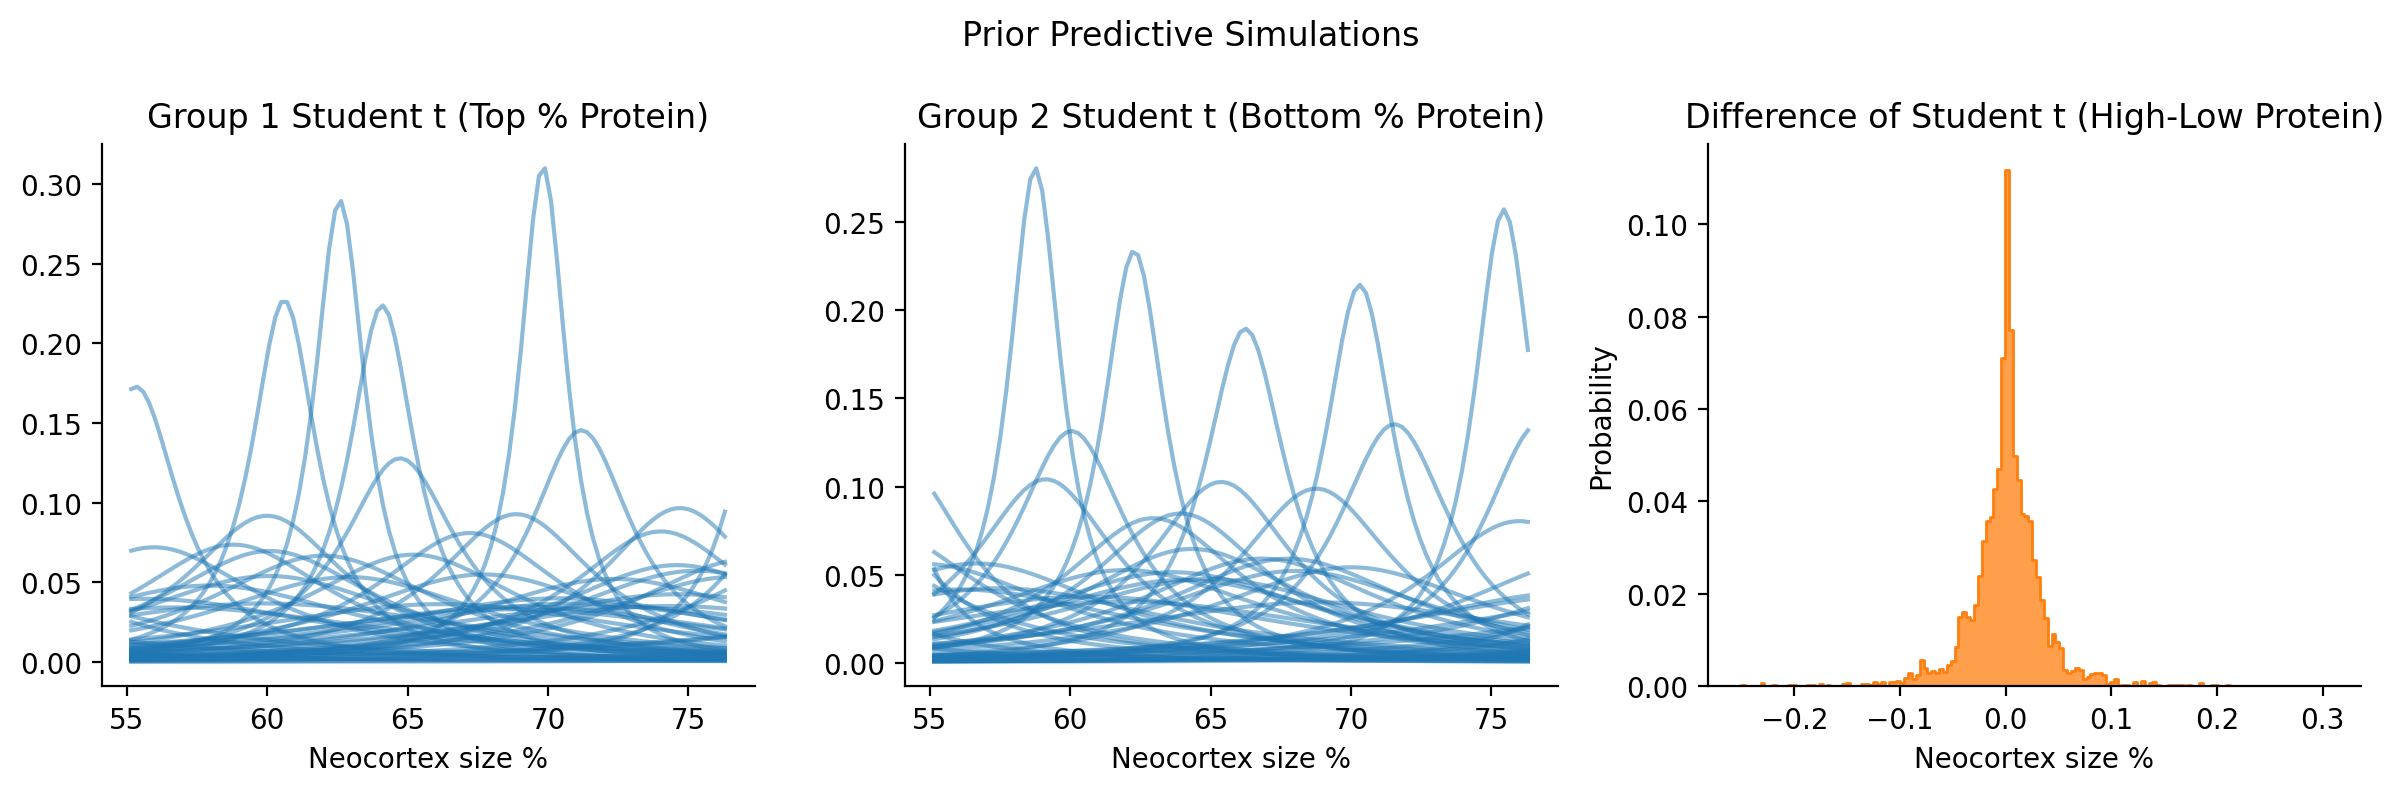

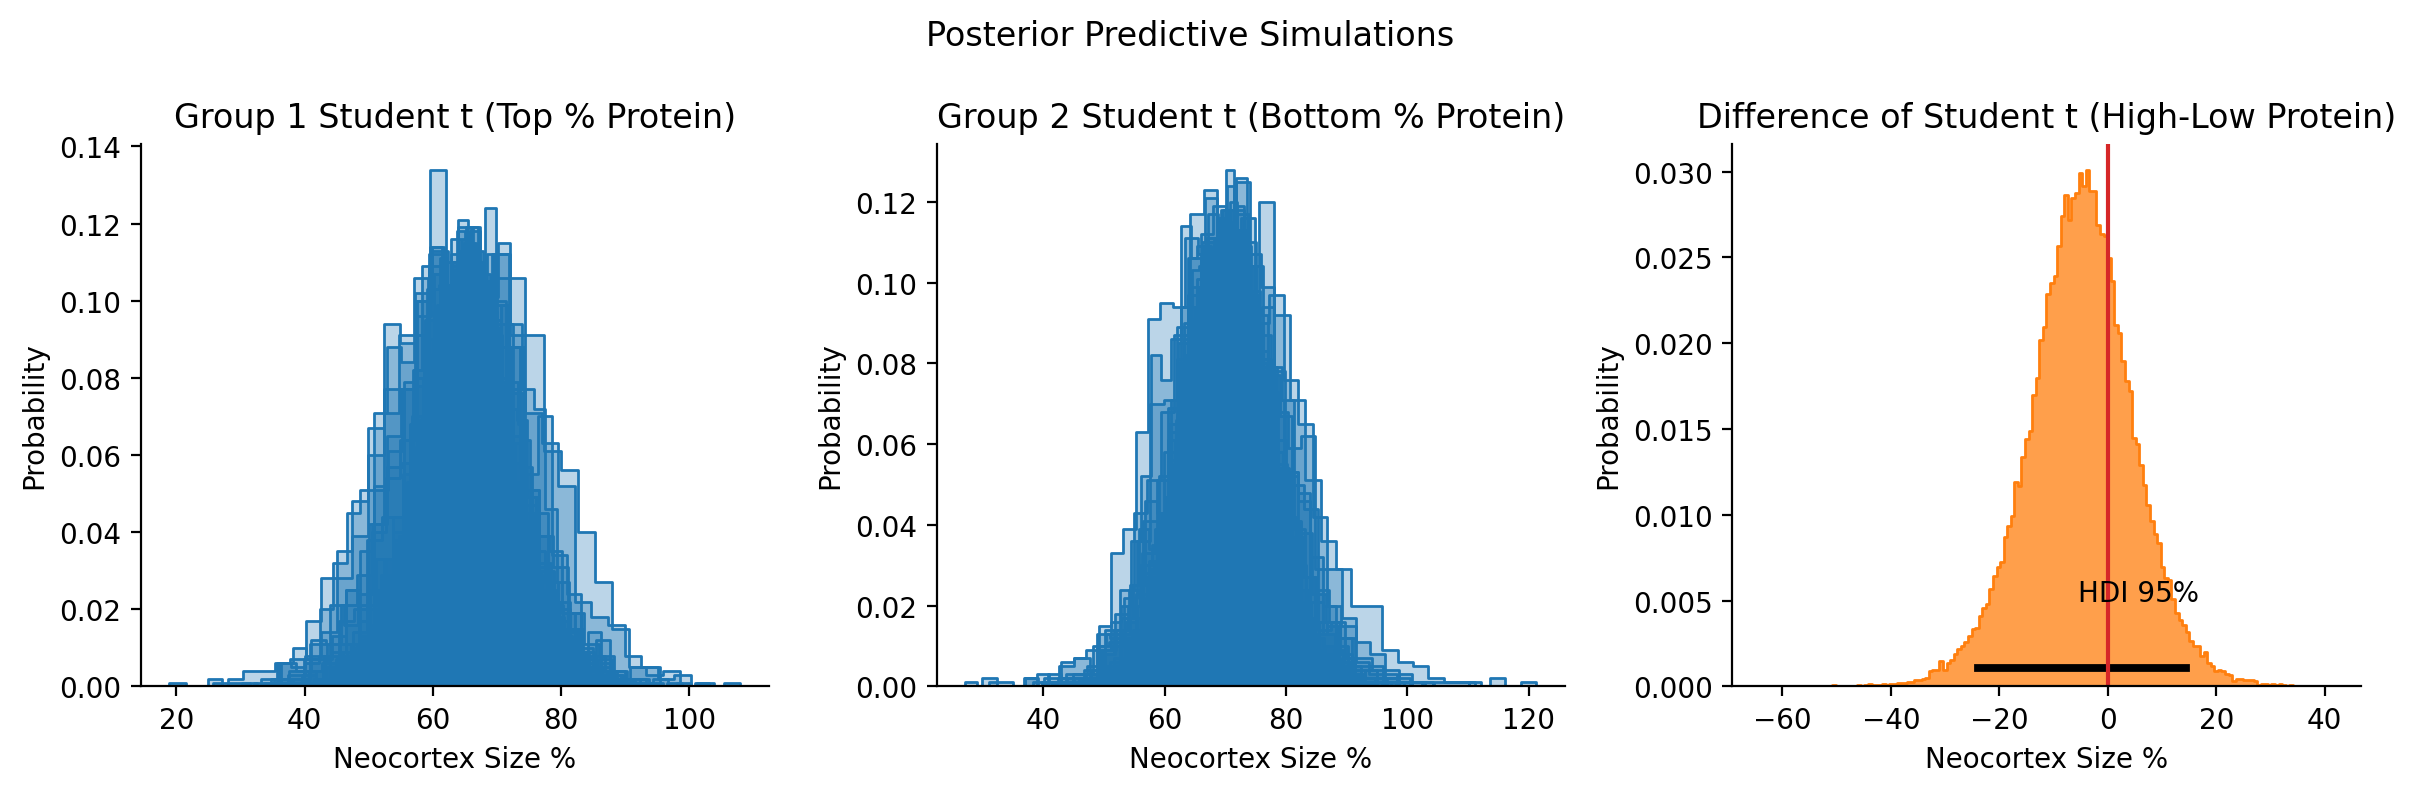

In [28]:
# Variables (assumed defined earlier: empircal_mean, empircal_stdev)
x_range = np.linspace(milk["neocortex.perc"].min(), milk["neocortex.perc"].max(), 100)

# Prior Predictive Simulations
rng = np.random.default_rng(11206)
y1s, y2s = [], []
n_iter = 50

for _ in range(n_iter):
    mu_1 = rng.normal(loc=empircal_mean, scale=empircal_stdev)
    mu_2 = rng.normal(loc=empircal_mean, scale=empircal_stdev)
    sigma_1, sigma_2 = rng.uniform(1, 10, 2)
    v = rng.exponential(1 / 29) + 1

    y1s.append(stats.t(df=v, loc=mu_1, scale=sigma_1).pdf(x_range))
    y2s.append(stats.t(df=v, loc=mu_2, scale=sigma_2).pdf(x_range))

# Plotting the results
fig, axes = plt.subplots(figsize=(12, 4), ncols=3)
for i in range(n_iter):
    axes[0].plot(x_range, y1s[i], color="tab:blue", alpha=0.5)
    axes[1].plot(x_range, y2s[i], color="tab:blue", alpha=0.5)

sns.histplot(np.array(y1s).reshape(-1) - np.array(y2s).reshape(-1), color="tab:orange", stat="probability", element="step", ax=axes[2])

for ax in axes:
    ax.set_xlabel("Neocortex size %")
axes[0].set_title("Group 1 Student t (Top % Protein)")
axes[1].set_title("Group 2 Student t (Bottom % Protein)")
axes[2].set_title("Difference of Student t (High-Low Protein)")

plt.suptitle('Prior Predictive Simulations')
plt.tight_layout()
sns.despine()

# Posterior Predictive Analysis
y1s, y2s = [], []
for i in rng.integers(0, 10000, n_iter):
    mu_1 = trace_model5.posterior['mu_1'].values.flatten()[i]
    mu_2 = trace_model5.posterior['mu_2'].values.flatten()[i]
    sigma_1 = trace_model5.posterior['sigma_1'].values.flatten()[i]
    sigma_2 = trace_model5.posterior['sigma_2'].values.flatten()[i]
    v = trace_model4.posterior['v'].values.flatten()[i]

    y1s.append(rng.standard_t(v, 1000) * sigma_1 + mu_1)
    y2s.append(rng.standard_t(v, 1000) * sigma_2 + mu_2)

# Posterior Predictive Plotting
fig, axes = plt.subplots(figsize=(12, 4), ncols=3)
for i in range(n_iter):
    sns.histplot(np.array(y1s[i]), color="tab:blue", stat="probability", element="step", ax=axes[0], alpha=0.3)
    sns.histplot(np.array(y2s[i]), color="tab:blue", stat="probability", element="step", ax=axes[1], alpha=0.3)

sns.histplot(np.array(y1s).reshape(-1) - np.array(y2s).reshape(-1), color="tab:orange", stat="probability", element="step", ax=axes[2])
axes[2].axvline(0, color='tab:red')

# HDI Calculation and Plotting
hdi_lower, hdi_upper = az.hdi(np.array(y1s).reshape(-1) - np.array(y2s).reshape(-1), hdi_prob=0.95)
axes[2].axvspan(hdi_lower, hdi_upper, ymin=0.03, ymax=0.04, color="black")
axes[2].text((hdi_lower + hdi_upper) / 2 - 0.5, 0.005, "HDI 95%")

for ax in axes:
    ax.set_xlabel("Neocortex Size %")
axes[0].set_title("Group 1 Student t (Top % Protein)")
axes[1].set_title("Group 2 Student t (Bottom % Protein)")
axes[2].set_title("Difference of Student t (High-Low Protein)")

plt.suptitle('Posterior Predictive Simulations')
plt.tight_layout()
sns.despine()


According to the plots above, the neocortex size % is larger in monkeys with less protein in their milk. We can confirm this by looking at the HDI 95%/difference posterior curve in orange and observe that the majority falls in the negative values. However, since the HDI 95% does include 0, there is a chance that the expected difference in these two samples is not significant at all. All in all, I would not draw any conclusions from this analysis.